In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import torch.nn as nn

In [24]:
X =  torch.linspace(1,50,50).reshape(-1,1)

In [25]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [26]:
y = 2*X+1 + e

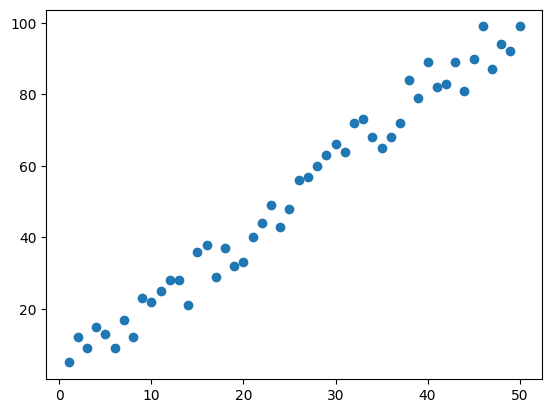

In [30]:
plt.scatter(X.numpy(),y.numpy())

In [138]:
torch.manual_seed(59)

model = nn.Linear(in_features=1,out_features=1)

In [191]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [192]:
torch.manual_seed(59)
model1 = Model(in_features=1,out_features=1)

In [193]:
model1.linear.weight.item()

0.10597813129425049

In [194]:
model1.linear.bias.item()

0.9637961387634277

In [195]:
for name,param in model1.named_parameters():
    print('name:',name,'\t','parameters:',param.item())

name: linear.weight 	 parameters: 0.10597813129425049
name: linear.bias 	 parameters: 0.9637961387634277


In [196]:
model1.forward(torch.tensor([2.0]))

tensor([1.1758], grad_fn=<AddBackward0>)

In [197]:
x1 = np.linspace(0.0,5.0,50)

In [198]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [199]:
y1

array([0.9637    , 0.97450612, 0.98531224, 0.99611837, 1.00692449,
       1.01773061, 1.02853673, 1.03934286, 1.05014898, 1.0609551 ,
       1.07176122, 1.08256735, 1.09337347, 1.10417959, 1.11498571,
       1.12579184, 1.13659796, 1.14740408, 1.1582102 , 1.16901633,
       1.17982245, 1.19062857, 1.20143469, 1.21224082, 1.22304694,
       1.23385306, 1.24465918, 1.25546531, 1.26627143, 1.27707755,
       1.28788367, 1.2986898 , 1.30949592, 1.32030204, 1.33110816,
       1.34191429, 1.35272041, 1.36352653, 1.37433265, 1.38513878,
       1.3959449 , 1.40675102, 1.41755714, 1.42836327, 1.43916939,
       1.44997551, 1.46078163, 1.47158776, 1.48239388, 1.4932    ])

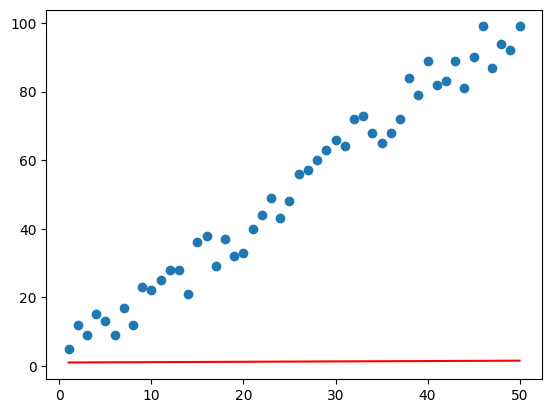

In [200]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(X.numpy(),y1,'r')

In [201]:
criterion = nn.MSELoss()

In [202]:
optimizer = torch.optim.SGD(model1.parameters(),lr=0.001)

In [203]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model1.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    print(f"epoch {i} loss:{loss.item()} weight : {model1.linear.weight.item()} bias {model1.linear.bias.item()}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

epoch 0 loss:3057.216796875 weight : 0.10597813129425049 bias 0.9637961387634277
epoch 1 loss:1588.5311279296875 weight : 3.334900379180908 bias 1.0604636669158936
epoch 2 loss:830.2999877929688 weight : 1.0148327350616455 bias 0.9922628402709961
epoch 3 loss:438.8524169921875 weight : 2.6817996501922607 bias 1.0425218343734741
epoch 4 loss:236.7615203857422 weight : 1.4840211868286133 bias 1.0076650381088257
epoch 5 loss:132.4291229248047 weight : 2.3446059226989746 bias 1.0339646339416504
epoch 6 loss:78.56572723388672 weight : 1.7262253761291504 bias 1.0163217782974243
epoch 7 loss:50.75775909423828 weight : 2.170504093170166 bias 1.0302516222000122
epoch 8 loss:36.4012336730957 weight : 1.8512457609176636 bias 1.0214954614639282
epoch 9 loss:28.989229202270508 weight : 2.0806007385253906 bias 1.029038906097412
epoch 10 loss:25.162382125854492 weight : 1.9157683849334717 bias 1.0248701572418213
epoch 11 loss:23.186473846435547 weight : 2.034165620803833 bias 1.0291162729263306
epoch

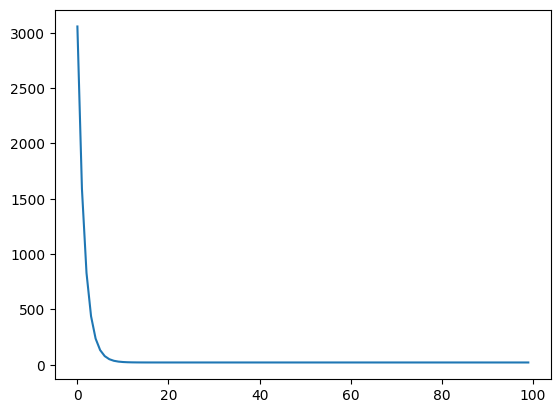

In [204]:
plt.plot(range(epochs),losses)

In [205]:
x = np.linspace(0.0,50.0,50)
current_weight = model1.linear.weight.item()
current_bias = model1.linear.bias.item()
predicted_y = current_weight * x + current_bias

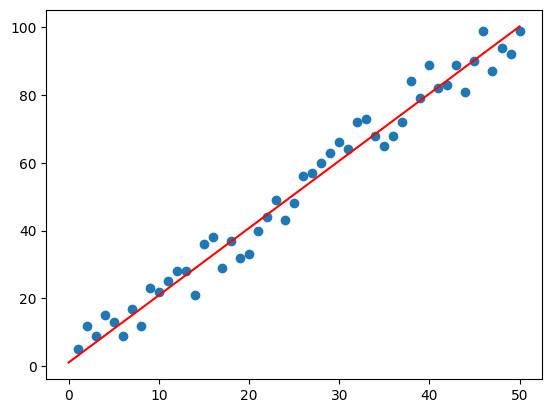

In [207]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')